#The variance of the image transformed into wavelets

#The asymmetry of the image transformed into wavelets

#Kurtosis of the image transformed into wavelets

#Image entropy

#kurtosis- identifies whether the tails of a given distribution contain extreme values, in a normal distribution curve.
if 0-Real Banknotes, else Fake Banknotes

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
pd.options.display.max_columns
df=pd.read_csv("currency .csv")

In [4]:
df.head()

,Variance,Skewness,Kurtosis,Image_entropy,label
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Data Preprocessing

In [7]:
df.describe(include="all")

,Variance,Skewness,Kurtosis,Image_entropy,label
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


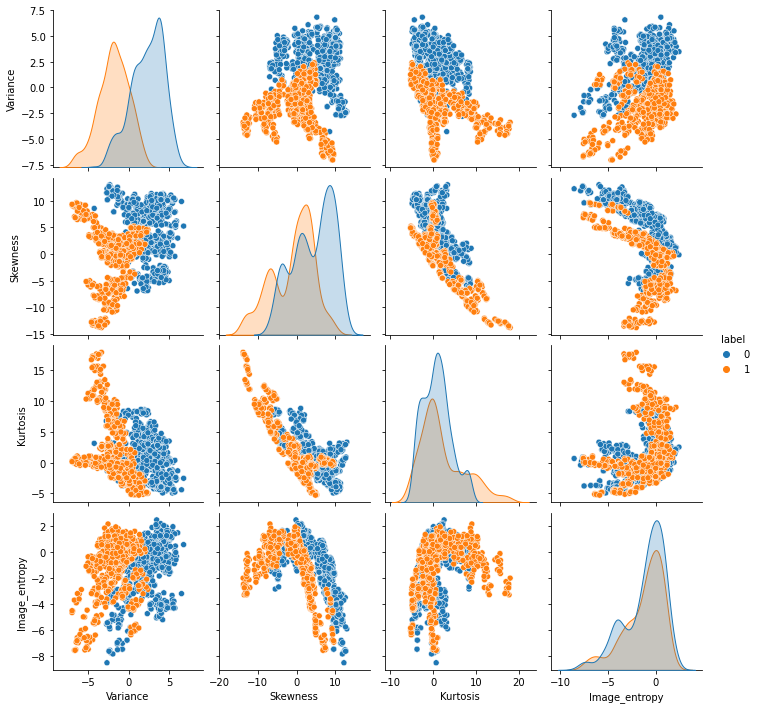

In [24]:
sns.pairplot(df, hue="label")
plt.show()
plt.close()

#from the above graph:

1) The plot distribution for kurtosis and image_entropy looks quite similar, whereas the distribution differs in skewness and variances.

2) Some features seems to be correlated.

In [8]:
#Checking for datatypes
df.dtypes

Variance         float64
Skewness         float64
Kurtosis         float64
Image_entropy    float64
label              int64
dtype: object

#### Handling missing values

In [9]:
df.isnull().sum()

Variance         0
Skewness         0
Kurtosis         0
Image_entropy    0
label            0
dtype: int64

#there is no missing values in the dataset

#### Detecting outliers

<AxesSubplot:xlabel='label', ylabel='Skewness'>

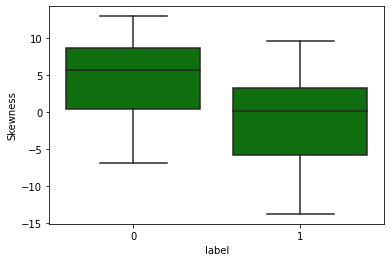

In [12]:
sns.boxplot(x=df["label"], y=df["Skewness"], color="green" )

<AxesSubplot:xlabel='label', ylabel='Kurtosis'>

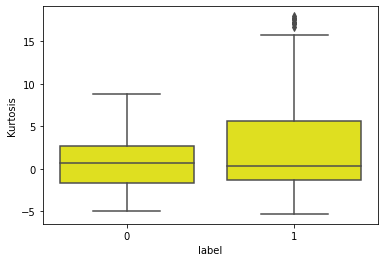

In [14]:
#Similarly for each columns,
sns.boxplot(x=df["label"], y=df["Kurtosis"], color="yellow" )

#In kurtosis there are some outliers

<AxesSubplot:xlabel='label', ylabel='Variance'>

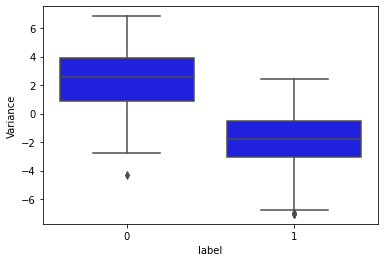

In [15]:
sns.boxplot(x=df["label"], y=df["Variance"], color="blue" )


<AxesSubplot:xlabel='label', ylabel='Image_entropy'>

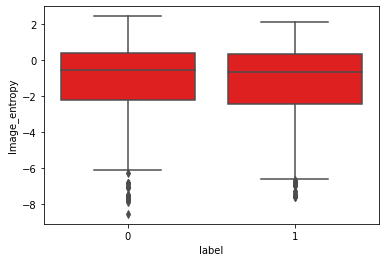

In [17]:
sns.boxplot(x=df["label"], y=df["Image_entropy"], color="red" )

#there are some outliers in variance,image entropy 

In [95]:
q1= df["Image_entropy"].quantile(0.25)
q3= df["Image_entropy"].quantile(0.75)
IQR= q3-q1
min_outliers= df[df["Image_entropy"]<=(q1-1.5*IQR)]
max_outliers= df[df["Image_entropy"]>=(q3+1.5*IQR)]
print('\033[1m',"The outliers below the 5% of the data is:-\n",min_outliers.shape,"\n",
     "The outliers above 96% of the data is:-\n",max_outliers.shape)

 The outliers below the 5% of the data is:-
 (2, 5) 
 The outliers above 96% of the data is:-
 (0, 5)


In [96]:
 df= df[df["Image_entropy"]<=(q3+1.5*IQR)]

In [97]:
#similarly for other columns,
q11= df["Kurtosis"].quantile(0.25)
q3_1= df["Kurtosis"].quantile(0.75)
IQ_range= q3-q1
min_outlier= df[df["Kurtosis"]<=(q1-1.5*IQR)]
max_outlier= df[df["Kurtosis"]>=(q3+1.5*IQR)]
print('\033[1m',"The outliers below the 5% of the data is:-\n",min_outlier.shape,"\n",
     "The outliers above 96% of the data is:-\n",max_outlier.shape)

 The outliers below the 5% of the data is:-
 (0, 5) 
 The outliers above 96% of the data is:-
 (0, 5)


In [26]:
 df= df[df["Kurtosis"]<=(q3+1.5*IQR)]

In [28]:
df.shape

(1107, 5)

In [29]:
#similarly for other columns,
q1_variance= df["Variance"].quantile(0.25)
q3_variance= df["Variance"].quantile(0.75)
IQ_range= q3-q1
min_outlier_var= df[df["Variance"]<=(q1-1.5*IQR)]
max_outlier_var= df[df["Variance"]>=(q3+1.5*IQR)]
print("The outliers below the 5% of the data is:-\n",min_outlier_var.shape,"\n",
     "The outliers above 96% of the data is:-\n",max_outlier_var.shape)

The outliers below the 5% of the data is:-
 (6, 5) 
 The outliers above 96% of the data is:-
 (81, 5)


In [34]:
 df= df[(df["Variance"]>=(q1-1.5*IQR)) & (df["Variance"]<=(q3+1.5*IQR))]

In [35]:
df.shape

(1020, 5)

<AxesSubplot:xlabel='label', ylabel='count'>

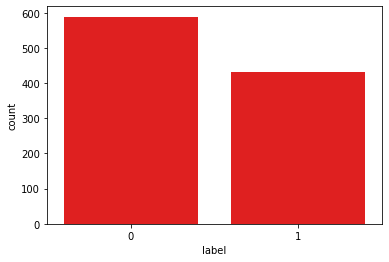

In [38]:
#### Checking if the target variable is balanced or not
sns.countplot(df["label"], color="red")

#The data looks balanced.

#### Splitting the data


In [39]:
from sklearn.model_selection import train_test_split, cross_val_score

In [42]:
x= df.drop("label" , axis=1)
y= df["label"]
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=42)

In [94]:
print('\033[1m',"The train data is:- \n", x_train.shape, y_train.shape,"\n",
     "The test data is:- \n", x_test.shape, y_test.shape)

 The train data is:- 
 (714, 4) (714,) 
 The test data is:- 
 (306, 4) (306,)


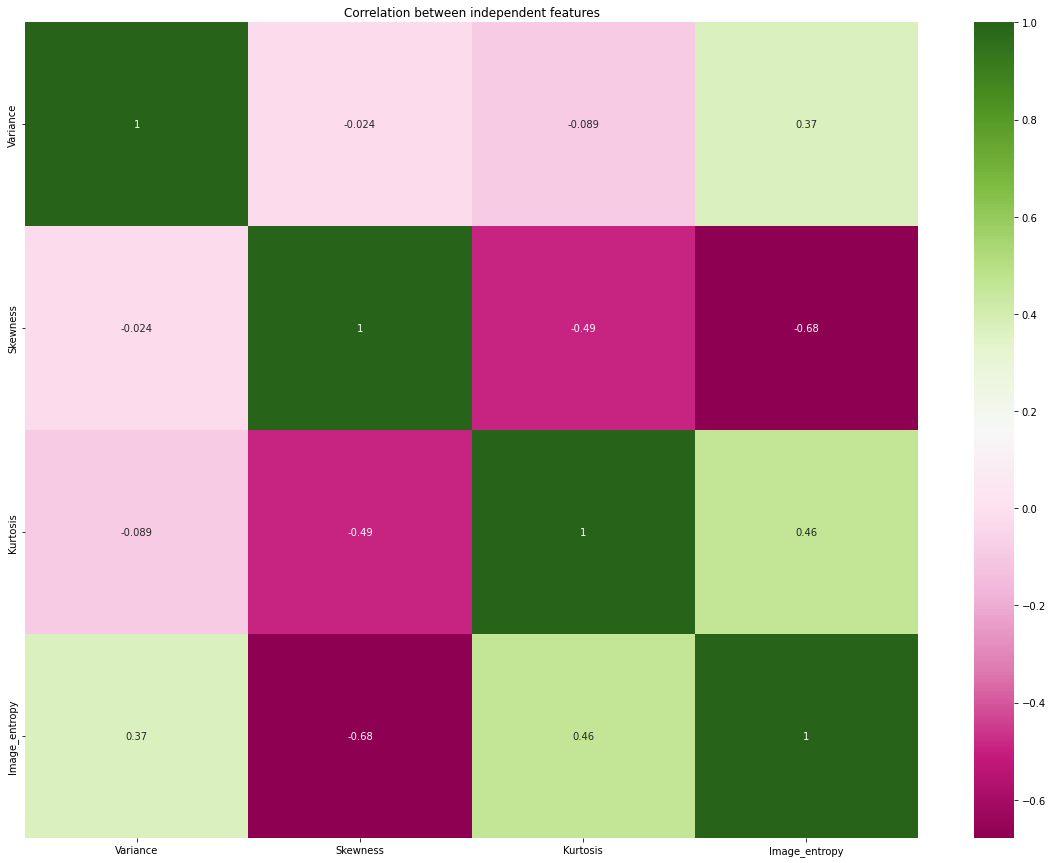

In [49]:
# Checking for the correlation
correlation= x_train.corr()
plt.figure(figsize=[20,15])
sns.heatmap(correlation, annot=True, cmap="PiYG")
plt.title("Correlation between independent features")
plt.show()
plt.close()

In [50]:
def correlations(dataset, threshold):
    column_cor= set()
    for i in range(len(correlation)):
        for j in range(i):
            if correlation.iloc[i,j]>threshold:
                column= correlation.columns[i]
                column_cor.add(column)
            return column_cor

In [51]:
correlated_features= correlations(x_train, 0.85)
correlated_features

set()

#there is no correlation between dataset

### Normalization

In [60]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()

train_std= std.fit_transform(x_train)
test_std= std.fit_transform(x_test)

#converting array into dataframe
X_train= pd.DataFrame(train_std,columns=x_train.columns)
X_test= pd.DataFrame(test_std, columns=x_test.columns)

## Model Building

### Decision Tree


In [61]:
from sklearn.tree import DecisionTreeClassifier
decison_tree= DecisionTreeClassifier()

In [62]:
X_train.shape

(714, 4)

#### Hyper-Paramter Tuning

In [63]:
y_train.shape

(714,)

In [73]:
#In order to select the best input, doing hyper-parameter optimization

paramters= {"max_depth":[3,4,5,6,7,8,9,10,11,12,13,14,15],
           "min_samples_split":[2,3,4,5,7,9,10],
           "min_samples_leaf":[1,2,4,5,6,8]}
from sklearn.model_selection import GridSearchCV

grid_search= GridSearchCV(decison_tree, param_grid=paramters,cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
            

Fitting 5 folds for each of 546 candidates, totalling 2730 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'min_samples_leaf': [1, 2, 4, 5, 6, 8],
                         'min_samples_split': [2, 3, 4, 5, 7, 9, 10]},
             verbose=1)

In [74]:
print("The best paramters for the decision tree model is:- ", grid_search.best_params_)

The best paramters for the decision tree model is:-  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 7}


In [86]:
classifer_tree=DecisionTreeClassifier(max_depth= 6, min_samples_leaf= 2, min_samples_split= 7)

classifer_tree.fit(X_train, y_train.values.reshape(-1,1))
y_pred_tree= classifer_tree.predict(X_test)
tree_prob= classifer_tree.predict_proba(x_test)
y_pred_train_tree= classifer_tree.predict(X_train)
tree_prob

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.

#### Model Evalution- Decision tree

In [93]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

print( '\033[1m',"The accuracy of Decision tree model is:--", accuracy_score(y_test, y_pred_tree),"\n",
     "The classification report is:---", classification_report(y_test, y_pred_tree))

print("The confusion matrix for Decision tree model is:--\n", confusion_matrix(y_test, y_pred_tree))

 The accuracy of Decision tree model is:-- 0.9705882352941176 
 The classification report is:---               precision    recall  f1-score   support

           0       0.99      0.96      0.98       186
           1       0.94      0.98      0.96       120

    accuracy                           0.97       306
   macro avg       0.97      0.97      0.97       306
weighted avg       0.97      0.97      0.97       306

The confusion matrix for Decision tree model is:--
 [[179   7]
 [  2 118]]


##### By using logistic regression, we get the accuracy of 97.05%

### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression


In [85]:
clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')
clf.fit(X_train, y_train.values.reshape(-1,1))

LogisticRegression(random_state=42)

#### Model Evalution-Logistic Regression

In [92]:
yhat_logistic= clf.predict(X_test)
print( '\033[1m',"The accuracy of logistic regression model is:--", accuracy_score(y_test, yhat_logistic),"\n",
     "The classification report is:---", classification_report(y_test, yhat_logistic))

print("The confusion matrix for logistic regression model is:--\n", confusion_matrix(y_test, yhat_logistic))

 The accuracy of logistic regression model is:-- 0.9934640522875817 
 The classification report is:---               precision    recall  f1-score   support

           0       1.00      0.99      0.99       186
           1       0.98      1.00      0.99       120

    accuracy                           0.99       306
   macro avg       0.99      0.99      0.99       306
weighted avg       0.99      0.99      0.99       306

The confusion matrix for logistic regression model is:--
 [[184   2]
 [  0 120]]


##### The model got the accuracy more than 99.34%